<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Introduction to Artificial Neural Networks </font></center>


# Project A - Information Signal

## Context

A communications equipment manufacturing company has a product that is responsible for emitting informative signals.

The company wants to build a machine learning model that can help the company predict the equipment’s signal quality using various parameters.

## Load the data set

In [ ]:
# install or upgrade the modules
#!pip install -U scikit-learn==1.5.2 scikeras tensorflow imblearn --quiet

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import h5py

import sklearn as sl
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV )
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter

import tensorflow as tf
from tensorflow.keras.layers import (
    InputLayer,
    BatchNormalization,
    Dense,
    Dropout )

import scikeras as sk
from scikeras.wrappers import KerasClassifier

from tensorflow.keras.optimizers import (
    Adam,
    SGD,
    RMSprop)

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [ ]:
# print versions
print(f'Teraform version :{tf.__version__}')
print(f'Sci Keras version :{sk.__version__}')
print(f'Scikit Learn version :{sl.__version__}')

Teraform version :2.19.0
Sci Keras version :0.13.0
Scikit Learn version :1.5.2


In [ ]:
# Fix random seed
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# load the dataset to pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/Neural Networks/NN Project Data - Signal.csv")

In [ ]:
# print the shape of the dataset
df.shape

(1599, 12)

There are 1599 rows and 12 columns in the data set

In [ ]:
# check the data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* All the input features are of float data type
* The target feature is integer data type

In [ ]:
# print the first 5 rows
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# print the random 5 rows
df.sample(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


## Handle missing values

In [ ]:
# check for missing values
df.isna().sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,0
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


* There are no actual missing values in the dataset.

* However, since these are numerical features, we’ll check for any features containing 0 values that might represent missing or placeholder entries.

In [ ]:
# Lets print how many zeros are there in each feature by percentage
((df==0).sum()/df.shape[0])*100

,0
Parameter 1,0.000000
Parameter 2,0.000000
Parameter 3,8.255159
Parameter 4,0.000000
Parameter 5,0.000000
Parameter 6,0.000000
Parameter 7,0.000000
Parameter 8,0.000000
Parameter 9,0.000000
Parameter 10,0.000000


**Observations**:

* Parameter 3 contains approximately 8.6% zeros, which may indicate missing values.

* All other features are complete and do not contain any missing data.

To prevent data leakage, missing values are handled after splitting the dataset into training and testing sets.

## Handle duplicated values

In [ ]:
# print duplicated rows
df[df.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


* There are 240 duplicated rows in the dataset

* The duplicate rows are removed in the dataset.

In [ ]:
# Remove the duplicated rows
df=df.drop_duplicates().reset_index(drop=True)
df.shape

(1359, 12)

* There are 1359 rows after removing the duplicates

## Distribution of target variable

In [ ]:
# Function to plot box and histogram for a numerical feature
def boxplot_histogram(data, feature, figsize=(15,5), kde=True, bins=None):
  """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,5))
    kde: whether to show the density curve (default True)
    bins: number of bins for histogram (default None)
  """
  fig, (axes_box, axes_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios" : (0.35,0.65)}, figsize=figsize )

  # box plot
  sns.boxplot(data=data, x=feature, showmeans=True, color="violet", ax=axes_box)

  # histogram
  if bins:
    sns.histplot(data=data, x=feature, ax=axes_hist, kde=kde, bins=bins)
  else:
    sns.histplot(data=data, x=feature, ax=axes_hist, kde=kde)

  # add mean and median in histogram
  axes_hist.axvline(data[feature].mean(), color="green", linestyle='--')
  axes_hist.axvline(data[feature].median(), color="black", linestyle='-')
  plt.show()

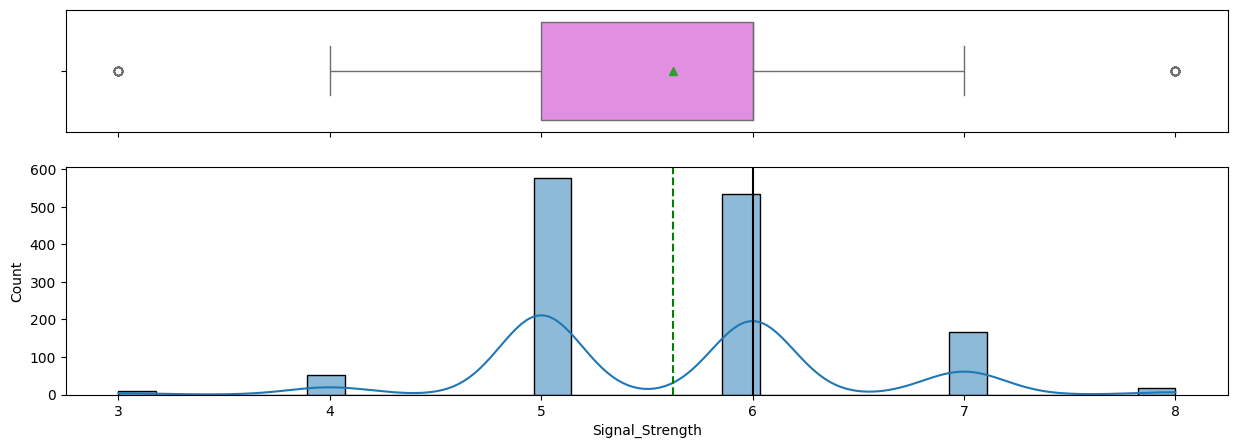

In [ ]:
# boxplot and histogram of target variable
boxplot_histogram(df, 'Signal_Strength')

* The target feature is discrete in nature.

* Its distribution is slightly left-skewed.

* Outliers are present on both ends of the distribution.

## Data Analysis

In [ ]:
# stats of the features
df.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Observations**:

* The mean is highest in Parameter 7
* The variation is high in the features Parameter 6 and Parameter 7
* The minimum signal strength is 3 and maximum is 8
* The average signal strength is about 5.6

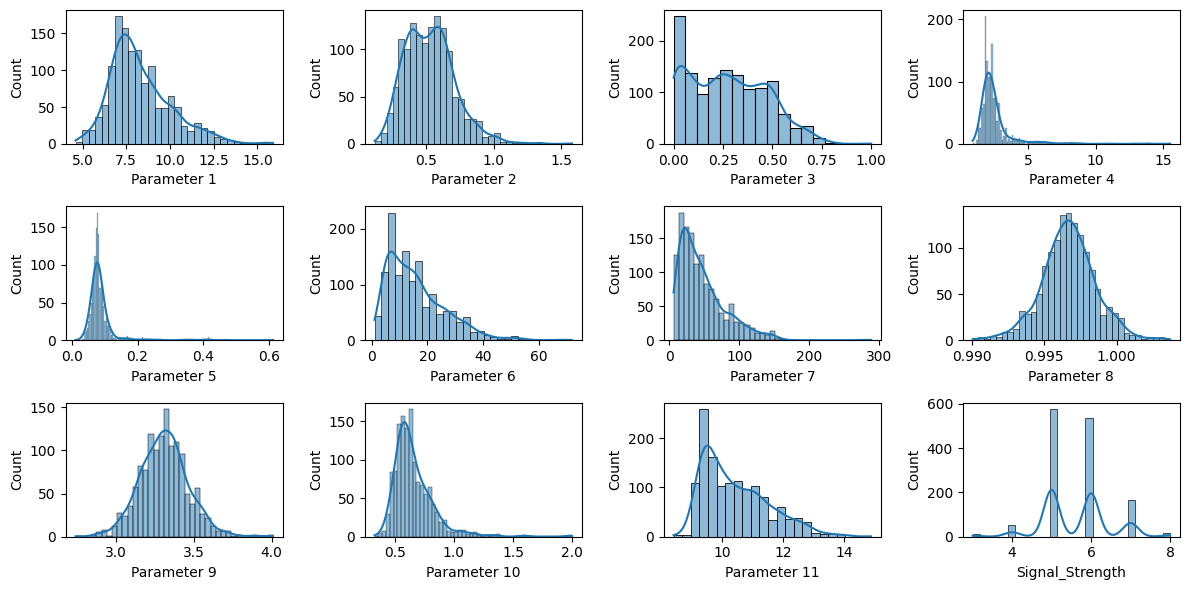

In [ ]:
# plot the histogram for all the features
plt.figure(figsize=(12,6))
for i,feature in enumerate(df.select_dtypes(include='number').columns.to_list()):
  plt.subplot(3,4,i+1)
  sns.histplot(data=df,x=feature, kde=True)
plt.tight_layout()
plt.show()

**Observations**:
* Signal_Strength is discrete in nature
* Parameter 8 and Parameter 9 are normally distributed
* Parameter 1, Parameter 3, Parameter 5 and Parameter 10 are slightly right skewed

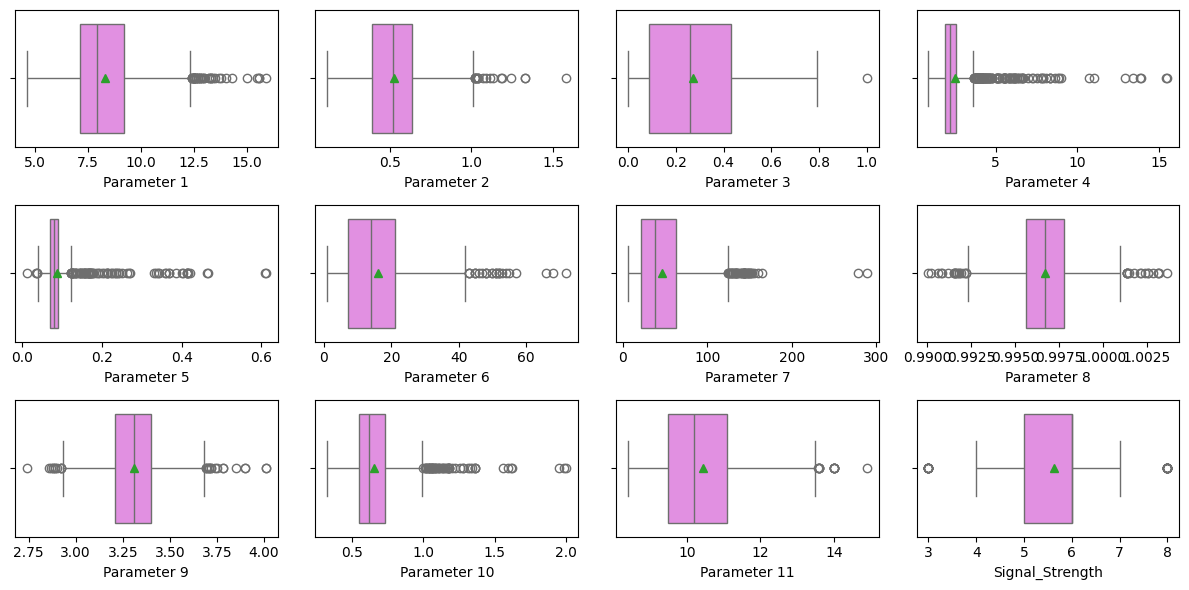

In [ ]:
# plot the boxplot for all the features
plt.figure(figsize=(12,6))
for i,feature in enumerate(df.select_dtypes(include='number').columns.to_list()):
  plt.subplot(3,4,i+1)
  sns.boxplot(data=df,x=feature,showmeans=True, color="violet")
plt.tight_layout()
plt.show()

**Observations**:

* Most features exhibit outliers.

* Signal Strength shows a slight left skew.

* Parameters 8 and 9 have nearly symmetrical distributions.

* Parameters 1–7, as well as Parameters 10 and 11, are either slightly right skewed or right-skewed.

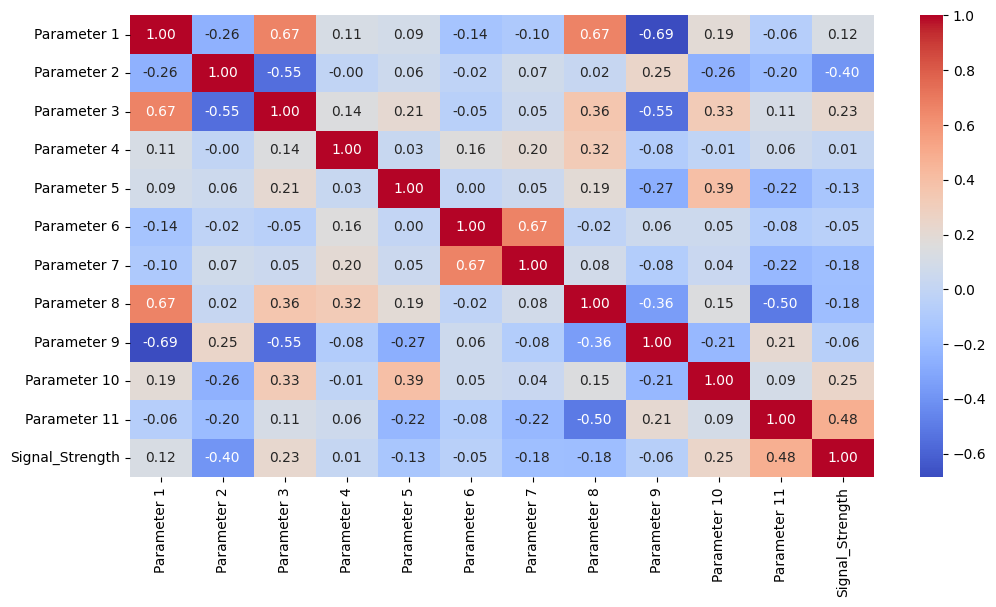

In [ ]:
## Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True, fmt='0.2f');

**Observations**:

* There is a moderate positive correlation between Signal Strength and Parameter 11.

* Signal Strength also shows a moderate negative correlation with Parameter 2.

* Parameter 1 and Parameter 8 are strongly positively correlated.

* A strong positive correlation is also observed between Parameter 6 and Parameter 7.

* Parameter 1 and Parameter 9 exhibit a strong negative correlation.


## Split Input and Output

In [ ]:
# set all input features to X
X = df.drop('Signal_Strength', axis=1)

# set target feature to y
y = df['Signal_Strength']

In [ ]:
# print random rows in X
X.sample(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
90,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.99670,3.39,0.56,9.8
505,12.0,0.280,0.49,1.9,0.074,10.0,21.0,0.99760,2.98,0.66,9.9
881,10.1,0.370,0.34,2.4,0.085,5.0,17.0,0.99683,3.17,0.65,10.6
331,11.4,0.625,0.66,6.2,0.088,6.0,24.0,0.99880,3.11,0.99,13.3
832,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4


In [ ]:
# Print the shape of input features
X.shape

(1359, 11)

In [ ]:
# Find the features that have missing values
(X == 0).sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,118
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


In [ ]:
# Print value counts with percentage
X['Parameter 3'].value_counts(normalize=True)*100

,proportion
Parameter 3,
0.00,8.682855
0.49,4.341428
0.24,3.016924
0.02,2.796174
0.08,2.354673
...,...
0.79,0.073584
0.71,0.073584
0.72,0.073584


In [ ]:
# Replace zero with NaN
X['Parameter 3'] = X['Parameter 3'].replace(0, np.nan)

In [ ]:
# print value counts after zero replaced by NaN
X['Parameter 3'].value_counts(dropna=False)

,count
Parameter 3,
NaN,118
0.49,59
0.24,41
0.02,38
0.08,32
...,...
0.79,1
0.71,1
0.72,1


In [ ]:
# print random rows in y
y.sample(5)

,Signal_Strength
274,5
1035,6
71,6
1027,7
258,5


# Split the dataset into train, test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# print shape of train data sets
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of y_train = {y_train.shape}")

Shape of X_train = (951, 11)
Shape of y_train = (951,)


In [ ]:
# print shape of test data sets
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_test = (408, 11)
Shape of y_test = (408,)


In [ ]:
# print the target feature counts in train dataset
y_train.value_counts(normalize=True)*100

,proportion
Signal_Strength,
5,42.481598
6,39.327024
7,12.302839
4,3.890641
8,1.261830
3,0.736067


In [ ]:
# print the target feature counts in test dataset
y_test.value_counts(normalize=True)*100

,proportion
Signal_Strength,
5,42.401961
6,39.460784
7,12.254902
4,3.921569
8,1.225490
3,0.735294


# Handle Missing values

In [ ]:
# Impute missing values with train data set mean
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

In [ ]:
# verify that there are no missing values in the train data
X_train.isna().sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,0
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


In [ ]:
# verify that there are no missing values in the test data set.
X_test.isna().sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,0
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


## Oversample the train data

### SMOTE technique

In [ ]:
# oversample the imbalanced data set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
# print random 5 rows in oversampled input features
X_train_sm = pd.DataFrame(X_train_sm, columns=X.columns)
X_train_sm.sample(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
1664,6.953104,0.495173,0.186345,1.854482,0.081241,9.000000,22.772410,0.995899,3.373310,0.479311,9.061379
101,7.800000,0.390000,0.420000,2.000000,0.086000,9.000000,21.000000,0.995260,3.390000,0.660000,11.600000
1638,5.310209,0.654644,0.117449,2.070408,0.063765,9.183681,65.591840,0.994066,3.737244,0.571837,12.005095
1367,6.909167,0.798904,0.218974,2.568250,0.091908,3.818333,12.590833,0.995664,3.587267,0.611817,11.377250
511,9.300000,0.480000,0.290000,2.100000,0.127000,6.000000,16.000000,0.996800,3.220000,0.720000,11.200000


In [ ]:
# print randoom 5 rows in overssampled target feature
y_train_sm.sample(5)

,Signal_Strength
2273,8
2241,8
2390,8
2139,8
2298,8


### Random Oversampler

In [ ]:
# Oversample using Random Oversampler
random_sampler = RandomOverSampler(random_state=42)
X_train_os, y_train_os = random_sampler.fit_resample(X_train, y_train)

In [ ]:
# print sample rows in X
X_train_os.sample(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
327,8.4,0.37,0.53,1.8,0.413,9.0,26.0,0.99790,3.06,1.06,9.1
342,7.8,0.44,0.28,2.7,0.100,18.0,95.0,0.99660,3.22,0.67,9.4
1310,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7
2096,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7
2269,7.2,0.38,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3


In [ ]:
# print sample rows in y
y_train_os.sample(5)

,Signal_Strength
1557,4
1924,7
755,5
53,5
1072,3


## Normalisation

In [ ]:
# scale the train and test data
# since many features has outliers , robust scaler is chosen over standard scaler
scaler = RobustScaler()

# fit with train data
scaler.fit(X_train)

# transform the train data
X_train = scaler.transform(X_train)

# transform the test data
X_test = scaler.transform(X_test)

In [ ]:
# transform the oversampled data
X_train_os = scaler.transform(X_train_os)

## One hot encoding

In [ ]:
# copy the target variable
y_train_actual = y_train.copy()
y_test_actual = y_test.copy()

y_train_sm_actual = y_train_sm.copy()
y_train_os_actual = y_train_os.copy()

# use pandas get dummies to perform one hot encoding
y_train = pd.get_dummies(y_train, dtype=int)
y_test = pd.get_dummies(y_test, dtype=int)

In [ ]:
# one hot encoding for oversampled target feature
y_train_sm = pd.get_dummies(y_train_sm, dtype=int)
y_train_os = pd.get_dummies(y_train_os, dtype=int)

## Neural Network - Design

### Simple Neural Network - Model 2Layers

A simple neural network with two hidden layers is created to start with analysis

In [ ]:
# set input and output units
input_units = X.shape[1]
output_units = 6

In [ ]:
# Lets create a simple network with two hidden layers with 16 units each
model_simple = tf.keras.Sequential()
model_simple.add(InputLayer(shape=(input_units,)))
model_simple.add(Dense(units=16,activation='relu',kernel_initializer='he_normal'))
model_simple.add(Dense(units=16,activation='relu',kernel_initializer='he_normal'))
model_simple.add(Dense(units=output_units,activation='softmax'))

In [ ]:
# Name the model and visualize
model_simple.name = 'Model_2Layers'
model_simple.summary()

Model: "Model_2Layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 566 (2.21 KB)

 Trainable params: 566 (2.21 KB)

 Non-trainable params: 0 (0.00 B)

### Train the simple neural network

Compile the model with
* Adam optimizer and loss as categorical crossentropy
* Use the accuracy metric

In [ ]:
model_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model
model_simple_history = model_simple.fit(X_train, y_train, epochs=50, verbose=2, validation_split=0.2)

Epoch 1/50
24/24 - 3s - 135ms/step - accuracy: 0.0868 - loss: 2.1661 - val_accuracy: 0.1466 - val_loss: 1.9748
Epoch 2/50
24/24 - 0s - 10ms/step - accuracy: 0.1974 - loss: 1.8647 - val_accuracy: 0.2565 - val_loss: 1.7573
Epoch 3/50
24/24 - 1s - 33ms/step - accuracy: 0.2921 - loss: 1.6770 - val_accuracy: 0.3403 - val_loss: 1.6151
Epoch 4/50
24/24 - 1s - 35ms/step - accuracy: 0.3763 - loss: 1.5413 - val_accuracy: 0.4031 - val_loss: 1.5083
Epoch 5/50
24/24 - 1s - 57ms/step - accuracy: 0.4184 - loss: 1.4365 - val_accuracy: 0.4084 - val_loss: 1.4278
Epoch 6/50
24/24 - 1s - 58ms/step - accuracy: 0.4474 - loss: 1.3550 - val_accuracy: 0.4188 - val_loss: 1.3665
Epoch 7/50
24/24 - 1s - 49ms/step - accuracy: 0.4513 - loss: 1.2934 - val_accuracy: 0.4450 - val_loss: 1.3205
Epoch 8/50
24/24 - 1s - 47ms/step - accuracy: 0.4592 - loss: 1.2477 - val_accuracy: 0.4450 - val_loss: 1.2837
Epoch 9/50
24/24 - 1s - 23ms/step - accuracy: 0.4711 - loss: 1.2124 - val_accuracy: 0.4660 - val_loss: 1.2546
Epoch 10/

### Model Evaluation

In [ ]:
# Evaluate the model on training data
model_simple.evaluate(X_train, y_train)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6503 - loss: 0.8698


[0.9076599478721619, 0.6267087459564209]

In [ ]:
# Evaluate the model on test data
model_simple.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5524 - loss: 1.1033 


[1.0815030336380005, 0.5539215803146362]

* The accuracy of the simple model is relatively low.

* The model appears to be underfitting, suggesting it is not capturing the underlying patterns in the data effectively.

### Loss and Accuracy plots

In [ ]:
# Function that plots the Loss and Accuracy on Train and Test data
def plot_loss_accuracy(history, title ):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))

  ax1.set_title(f'Loss for {title}')
  ax1.plot(history['loss'], label='train', color='blue')
  ax1.plot(history['val_loss'], label='validate', color='orange')
  ax1.set_xlabel('epochs')
  ax1.set_ylabel('loss')
  ax1.legend()

  ax2.set_title(f'Accuracy for {title}')
  ax2.plot(history['accuracy'], label='train', color='blue')
  ax2.plot(history['val_accuracy'], label='validate', color='orange')
  ax2.set_xlabel('epochs')
  ax2.set_ylabel('accuracy')
  ax2.legend()


  plt.show()

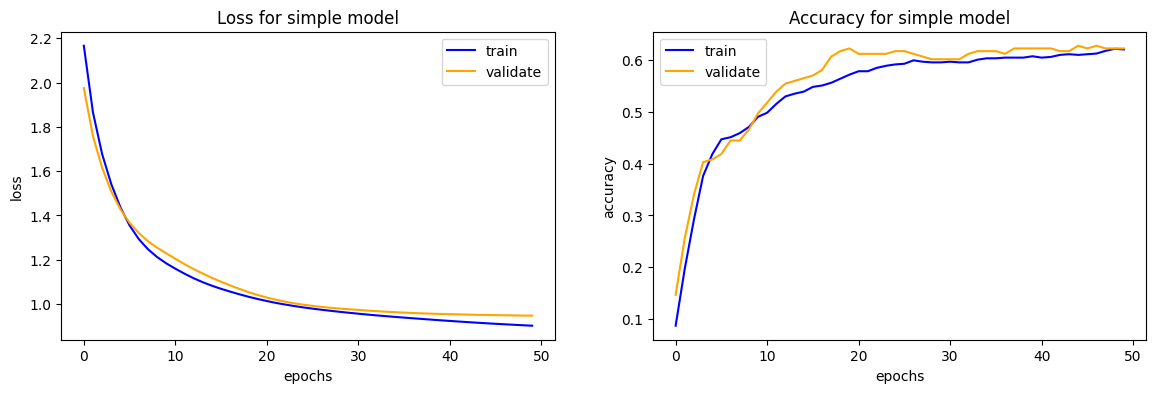

In [ ]:
# plot Loass and Accuracy
plot_loss_accuracy(model_simple_history.history,'simple model');

**Observations**:

* The model appears to generalize well across the training and test data.

* However, signs of underfitting suggest it may not be learning the underlying patterns sufficiently.

### Tune Neural Network - 3 Hidden Layers

Lets tune the simple neural network by adding one more hidden layer and increasing the neurons.

Also find the optimized parameters using grid search on below parameters
- optimizer
- activation
- dropout_rate
- batch_size
- epochs

In [ ]:
# Define a function to create a simple network
def create_model(optimizer='adam', activation='relu', units1=32, units2=16, units3=16):
  model = tf.keras.Sequential()
  model.add(InputLayer(shape=(input_units,)))
  model.add(Dense(units=units1,activation=activation,kernel_initializer='he_normal'))
  model.add(Dense(units=units2,activation=activation,kernel_initializer='he_normal'))
  model.add(Dense(units=units3,activation=activation,kernel_initializer='he_normal'))
  model.add(Dense(units=output_units,activation='softmax'))
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
============================================================ç
param_grid = {
    'batch_size': [32, 64],
    'epochs': [50,100],
    'model__optimizer': ['adam', 'sgd','rmsprop'],
    'model__activation': ['relu'],
    'model__units1' : [64],
    'model__units2' : [16],
    'model__units3' : [16]
}

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=1)

In [ ]:
# Step 4: Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [ ]:
%%time
grid_result = grid.fit(X_train, y_train)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0537 - loss: 3.0269
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2050 - loss: 1.9548 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3590 - loss: 1.5602 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4342 - loss: 1.3972 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4935 - loss: 1.2989 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5190 - loss: 1.2245 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5440 - loss: 1.1721 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5646 - loss: 1.1336 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5647 - loss: 1.1042 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5776 - loss: 1.0813 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5834 - loss: 1.0624 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

In [ ]:
# Step 5: Print best params
print("Best parameters found: ", grid_result.best_params_)
print("Best cross-validation accuracy: ", grid_result.best_score_)

Best parameters found:  {'batch_size': 64, 'epochs': 100, 'model__activation': 'relu', 'model__optimizer': 'adam', 'model__units1': 64, 'model__units2': 16, 'model__units3': 16}
Best cross-validation accuracy:  0.5867507886435331


In [ ]:
opt_model = create_model(optimizer=grid_result.best_params_.get('model__optimizer'),
                         activation=grid_result.best_params_.get('model__activation'),
                         units1=grid_result.best_params_.get('model__units1'),
                         units2=grid_result.best_params_.get('model__units2'),
                         units3=grid_result.best_params_.get('model__units3'),
                         )

In [ ]:
# visualize the model
opt_model.name = 'Model_3Layers'
opt_model.summary()

Model: "Model_3Layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,182 (8.52 KB)

 Trainable params: 2,182 (8.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
opt_model_history = opt_model.fit(X_train, y_train, epochs=grid_result.best_params_.get('epochs'), batch_size=grid_result.best_params_.get('batch_size'),
                                  verbose=2, validation_split=0.2)

Epoch 1/100
12/12 - 2s - 146ms/step - accuracy: 0.1895 - loss: 2.1238 - val_accuracy: 0.2042 - val_loss: 1.7596
Epoch 2/100
12/12 - 0s - 10ms/step - accuracy: 0.2079 - loss: 1.7151 - val_accuracy: 0.2880 - val_loss: 1.5937
Epoch 3/100
12/12 - 0s - 13ms/step - accuracy: 0.3566 - loss: 1.4952 - val_accuracy: 0.4136 - val_loss: 1.4504
Epoch 4/100
12/12 - 0s - 10ms/step - accuracy: 0.4947 - loss: 1.3527 - val_accuracy: 0.4974 - val_loss: 1.3291
Epoch 5/100
12/12 - 0s - 11ms/step - accuracy: 0.5382 - loss: 1.2446 - val_accuracy: 0.5393 - val_loss: 1.2340
Epoch 6/100
12/12 - 0s - 12ms/step - accuracy: 0.5592 - loss: 1.1689 - val_accuracy: 0.5602 - val_loss: 1.1735
Epoch 7/100
12/12 - 0s - 10ms/step - accuracy: 0.5671 - loss: 1.1189 - val_accuracy: 0.5916 - val_loss: 1.1315
Epoch 8/100
12/12 - 0s - 10ms/step - accuracy: 0.5724 - loss: 1.0827 - val_accuracy: 0.5864 - val_loss: 1.0989
Epoch 9/100
12/12 - 0s - 11ms/step - accuracy: 0.5868 - loss: 1.0573 - val_accuracy: 0.6021 - val_loss: 1.0741


In [ ]:
# Evaluate on Train data
opt_model.evaluate(X_train, y_train)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7549 - loss: 0.6141


[0.7006266117095947, 0.7234489917755127]

In [ ]:
# Evaluate on Test data
opt_model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5780 - loss: 1.2019 


[1.192365050315857, 0.5882353186607361]

### Tuning model - Loss and Accuracy

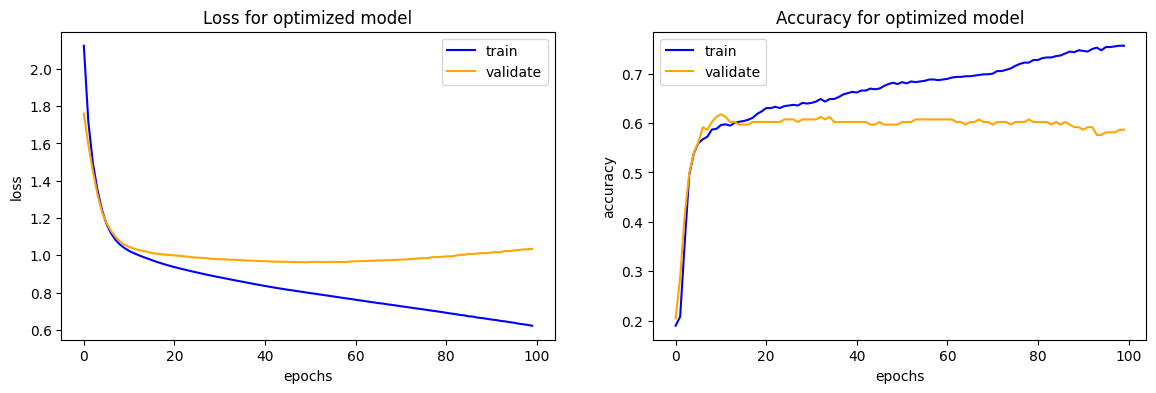

In [ ]:
# plot the Loss and Accuracy
plot_loss_accuracy(opt_model_history.history, 'optimized model');

**Observations**:

* The validation loss initially decreases but then plateaus after a certain point in training.

* While training accuracy continues to improve, validation accuracy remains relatively unchanged.

* As training progresses, the gap between training and validation accuracy widens, indicating potential overfitting.

### Tune the model with Batch Normalization and dropouts

In [ ]:
# Define a function to create a simple network
def create_tuned_model(optimizer='adam', activation='relu', units1=32, units2=16, units3=16, dropout_rate=0.0):
  model = tf.keras.Sequential()
  model.add(InputLayer(shape=(input_units,)))
  model.add(BatchNormalization())
  model.add(Dense(units=units1,activation=activation,kernel_initializer='he_normal'))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
  model.add(Dense(units=units2,activation=activation,kernel_initializer='he_normal'))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
  model.add(Dense(units=units3,activation=activation,kernel_initializer='he_normal'))
  model.add(Dropout(dropout_rate))
  model.add(BatchNormalization())
  model.add(Dense(units=output_units,activation='softmax'))
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
param_grid2 = {
    'batch_size': [32, 64],
    'epochs': [50,100],
    'model__optimizer': ['adam','rmsprop'],
    'model__activation': ['relu'],
    #'model__units1' : [46],
    'model__units1' : [92],
    'model__units2' : [23],
    'model__units3' : [23],
    'model__dropout_rate' : [0.2, 0.3]
}

In [ ]:
# set the model using Keras Classifier
model_opt2 = KerasClassifier(build_fn=create_tuned_model, verbose=1)

### Tuning Model - Grid search

In [ ]:
# Step 4: Perform Grid Search
grid2 = GridSearchCV(estimator=model_opt2, param_grid=param_grid2, n_jobs=-1, cv=3)

In [ ]:
%%time
grid_result2 = grid2.fit(X_train, y_train)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2114 - loss: 2.0695
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3157 - loss: 1.8407
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3543 - loss: 1.7399
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4093 - loss: 1.6566 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4874 - loss: 1.5295
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4943 - loss: 1.4876 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4671 - loss: 1.4868 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5210 - loss: 1.4218 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5366 - loss: 1.3417
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5482 - loss: 1.2907 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5540 - loss: 1.3145 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc

In [ ]:
# Print best params
print("Best parameters found: ", grid_result2.best_params_)
print("Best cross-validation accuracy: ", grid_result2.best_score_)

Best parameters found:  {'batch_size': 64, 'epochs': 100, 'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__optimizer': 'rmsprop', 'model__units1': 92, 'model__units2': 23, 'model__units3': 23}
Best cross-validation accuracy:  0.5972660357518401


In [ ]:
# Initialize the model with best params
opt_model2 = create_tuned_model(optimizer=grid_result2.best_params_.get('model__optimizer'),
                                activation=grid_result2.best_params_.get('model__activation'),
                                units1=grid_result2.best_params_.get('model__units1'),
                                units2=grid_result2.best_params_.get('model__units2'),
                                units3=grid_result2.best_params_.get('model__units3'),
                                dropout_rate=grid_result2.best_params_.get('model__dropout_rate'))

In [ ]:
# Visualize the tuned model
opt_model2.name = 'Model_Normalized_Dropouts'
opt_model2.summary()

Model: "Model_Normalized_Dropouts"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_4           │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 92)             │         1,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 92)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 92)             │           368 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 23)             │         2,139 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 23)             │            92 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 23)             │            92 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │           144 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,535 (17.71 KB)

 Trainable params: 4,237 (16.55 KB)

 Non-trainable params: 298 (1.16 KB)

### Train the normalized and dropout model

In [ ]:
# Train the tuned model
opt_model2_history = opt_model2.fit(X_train, y_train, epochs=grid_result2.best_params_.get('epochs'), batch_size=grid_result2.best_params_.get('batch_size'),
                                    verbose=2, validation_split=0.2)

Epoch 1/100
12/12 - 3s - 251ms/step - accuracy: 0.2066 - loss: 2.1890 - val_accuracy: 0.5183 - val_loss: 1.5281
Epoch 2/100
12/12 - 0s - 19ms/step - accuracy: 0.2447 - loss: 2.0223 - val_accuracy: 0.5288 - val_loss: 1.5027
Epoch 3/100
12/12 - 0s - 11ms/step - accuracy: 0.3026 - loss: 1.8727 - val_accuracy: 0.5288 - val_loss: 1.4694
Epoch 4/100
12/12 - 0s - 12ms/step - accuracy: 0.3118 - loss: 1.7829 - val_accuracy: 0.5340 - val_loss: 1.4330
Epoch 5/100
12/12 - 0s - 12ms/step - accuracy: 0.3579 - loss: 1.7003 - val_accuracy: 0.5445 - val_loss: 1.3892
Epoch 6/100
12/12 - 0s - 25ms/step - accuracy: 0.3776 - loss: 1.6172 - val_accuracy: 0.5759 - val_loss: 1.3497
Epoch 7/100
12/12 - 0s - 11ms/step - accuracy: 0.4224 - loss: 1.5239 - val_accuracy: 0.5969 - val_loss: 1.3088
Epoch 8/100
12/12 - 0s - 11ms/step - accuracy: 0.4303 - loss: 1.5240 - val_accuracy: 0.5916 - val_loss: 1.2682
Epoch 9/100
12/12 - 0s - 11ms/step - accuracy: 0.4474 - loss: 1.4601 - val_accuracy: 0.5916 - val_loss: 1.2417


In [ ]:
opt_model2.evaluate(X_train, y_train)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6823 - loss: 0.7684


[0.8075105547904968, 0.6540483832359314]

In [ ]:
opt_model2.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5751 - loss: 0.9907 


[0.9948469400405884, 0.5808823704719543]

**Observations**:

* The test dataset accuracy has improved compared to the previous models.

* However, the overall accuracy is still not very high and leaves room for further improvement.

* The model demonstrates good generalization, showing consistent performance across both the training and test datasets.



### Batch Normalization - Dropout - Loss and Accuracy

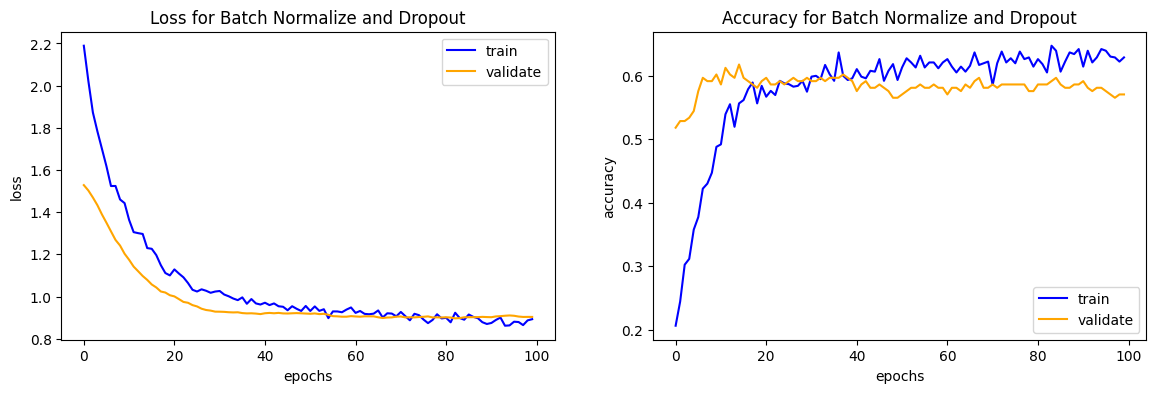

In [ ]:
plot_loss_accuracy(opt_model2_history.history, 'Batch Normalize and Dropout');

**Observations**

* The loss and accuracy curves for the training and validation datasets are converging, indicating consistent performance across both sets.

* However, the overall accuracy remains relatively low, suggesting the model may still need improvement

### Train model on SMOTE data set

Lets analyzing by increasing the size of the dataset.

In [ ]:
sm_model = create_tuned_model(optimizer=grid_result2.best_params_.get('model__optimizer'),
                                activation=grid_result2.best_params_.get('model__activation'),
                                units1=grid_result2.best_params_.get('model__units1'),
                                units2=grid_result2.best_params_.get('model__units2'),
                                units3=grid_result2.best_params_.get('model__units3'),
                                dropout_rate=grid_result2.best_params_.get('model__dropout_rate'))
sm_model.name='Model_Smot'

In [ ]:
sm_model.fit(X_train_sm, y_train_sm, epochs=grid_result2.best_params_.get('epochs'),
             batch_size=grid_result2.best_params_.get('batch_size'),
             verbose=2, validation_split=0.2)

Epoch 1/100
31/31 - 3s - 90ms/step - accuracy: 0.2367 - loss: 2.1138 - val_accuracy: 0.0392 - val_loss: 2.4790
Epoch 2/100
31/31 - 0s - 10ms/step - accuracy: 0.3218 - loss: 1.7386 - val_accuracy: 0.0000e+00 - val_loss: 2.5440
Epoch 3/100
31/31 - 0s - 7ms/step - accuracy: 0.3997 - loss: 1.5736 - val_accuracy: 0.1031 - val_loss: 2.2811
Epoch 4/100
31/31 - 0s - 11ms/step - accuracy: 0.4538 - loss: 1.4212 - val_accuracy: 0.1835 - val_loss: 2.3800
Epoch 5/100
31/31 - 0s - 7ms/step - accuracy: 0.4647 - loss: 1.3378 - val_accuracy: 0.1856 - val_loss: 2.3194
Epoch 6/100
31/31 - 0s - 7ms/step - accuracy: 0.4884 - loss: 1.2792 - val_accuracy: 0.1897 - val_loss: 2.2939
Epoch 7/100
31/31 - 0s - 10ms/step - accuracy: 0.5235 - loss: 1.2041 - val_accuracy: 0.1856 - val_loss: 2.4510
Epoch 8/100
31/31 - 0s - 10ms/step - accuracy: 0.5229 - loss: 1.1961 - val_accuracy: 0.1814 - val_loss: 2.6918
Epoch 9/100
31/31 - 0s - 10ms/step - accuracy: 0.5317 - loss: 1.1391 - val_accuracy: 0.1691 - val_loss: 2.8579


In [ ]:
sm_model.evaluate(X_train_sm, y_train_sm)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6741 - loss: 0.7599


[1.0542346239089966, 0.6580032706260681]

In [ ]:
sm_model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1891 - loss: 41.8170 


[43.87532043457031, 0.20588235557079315]

The accuracy is dropped after increasing the dataset using SMOT technique.

### Train model on oversampled data set

In [ ]:
os_model = create_tuned_model(optimizer=grid_result2.best_params_.get('model__optimizer'),
                                activation=grid_result2.best_params_.get('model__activation'),
                                units1=grid_result2.best_params_.get('model__units1'),
                                units2=grid_result2.best_params_.get('model__units2'),
                                units3=grid_result2.best_params_.get('model__units3'),
                                dropout_rate=grid_result2.best_params_.get('model__dropout_rate'))
os_model.name='Model_Oversampled'

In [ ]:
os_model.fit(X_train_os, y_train_os, epochs=grid_result2.best_params_.get('epochs'),
             batch_size=grid_result2.best_params_.get('batch_size'),
             verbose=2, validation_split=0.2)

Epoch 1/100
31/31 - 3s - 92ms/step - accuracy: 0.2641 - loss: 1.9901 - val_accuracy: 0.0990 - val_loss: 2.0377
Epoch 2/100
31/31 - 0s - 10ms/step - accuracy: 0.3491 - loss: 1.6752 - val_accuracy: 0.0804 - val_loss: 2.2954
Epoch 3/100
31/31 - 1s - 20ms/step - accuracy: 0.4023 - loss: 1.5055 - val_accuracy: 0.0969 - val_loss: 2.4511
Epoch 4/100
31/31 - 1s - 19ms/step - accuracy: 0.4482 - loss: 1.3859 - val_accuracy: 0.1155 - val_loss: 2.5837
Epoch 5/100
31/31 - 0s - 10ms/step - accuracy: 0.4905 - loss: 1.2818 - val_accuracy: 0.1423 - val_loss: 2.7219
Epoch 6/100
31/31 - 1s - 23ms/step - accuracy: 0.5003 - loss: 1.2415 - val_accuracy: 0.1443 - val_loss: 2.8222
Epoch 7/100
31/31 - 1s - 18ms/step - accuracy: 0.5039 - loss: 1.2183 - val_accuracy: 0.1546 - val_loss: 2.8899
Epoch 8/100
31/31 - 0s - 16ms/step - accuracy: 0.5281 - loss: 1.1405 - val_accuracy: 0.1588 - val_loss: 2.9235
Epoch 9/100
31/31 - 0s - 10ms/step - accuracy: 0.5493 - loss: 1.1185 - val_accuracy: 0.1629 - val_loss: 2.9647
E

In [ ]:
os_model.evaluate(X_train_os, y_train_os)

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6849 - loss: 0.7139


[1.0158591270446777, 0.6538779139518738]

In [ ]:
os_model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5309 - loss: 1.0941 


[1.1177728176116943, 0.5269607901573181]

* After augmenting the dataset using a random sampler, there is some improvement in accuracy, but it remains comparable to that of the simple model.

* Overall, the accuracy is still relatively low.

### Part A - Final model selection

In [ ]:
results = []
for model in [model_simple, opt_model, opt_model2, sm_model, os_model]:
  results.append(
    {
     'model' : model.name,
     'Train Loss' : model.evaluate(X_train, y_train)[0],
     'Train Accuracy' :  model.evaluate(X_train, y_train)[1],
     'Test Loss' : model.evaluate(X_test, y_test)[0],
     'Test Accuracy' :  model.evaluate(X_test, y_test)[1]
     }
  )

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - loss: 0.8698 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - loss: 0.8698 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5524 - loss: 1.1033 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5524 - loss: 1.1033 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7549 - loss: 0.6141
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7549 - loss: 0.6141 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5780 - loss: 1.2019 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5780 - loss: 1.2019 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6823 - loss: 0.7684
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6823 - loss: 0.7684
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5751 - loss: 0.9907 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5751 - loss: 0.9907 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2245 - loss: 46.4277
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

In [ ]:
pd.DataFrame(results).set_index('model')

,Train Loss,Train Accuracy,Test Loss,Test Accuracy
model,,,,
Model_2Layers,0.907660,0.626709,1.081503,0.553922
Model_3Layers,0.700627,0.723449,1.192365,0.588235
Model_Normalized_Dropouts,0.807511,0.654048,0.994847,0.580882
Model_Smot,47.004391,0.213460,43.875320,0.205882
Model_Oversampled,0.829502,0.606730,1.117773,0.526961


**Observations**:
* The model incorporating batch normalization and dropout achieves relatively good accuracy and generalizes well, making it the preferred choice.

* However, to further improve accuracy, the problem should be explored using other modeling approaches.

* Additionally, it may be worth investigating this problem from a regression perspective to see if it yields better results.

# Project B - SVHN

**Context**:

Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the
building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition
community.

While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual
appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements.

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project, we will use the dataset with images centered around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex
than MNIST because of the distractor

### Read the HDF5 data set

In [ ]:
# Read the HDF5 file
hdf5_path = "/content/drive/MyDrive/Neural Networks/Autonomous_Vehicles_SVHN_single_grey1 (1).h5"
hf = h5py.File(hdf5_path, "r")
hf

<HDF5 file "Autonomous_Vehicles_SVHN_single_grey1 (1).h5" (mode r)>

### Print the keys

In [ ]:
# print the keys in the data set
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

The HDF5 file contains the following datasets (keys):

* X_train

* X_test

* X_val

* y_train

* y_test

* y_val


### Split the Datasets

In [ ]:
# Get Train , Test datasets
X_test = hf.get('X_test')[:]
X_train = hf.get('X_train')[:]

y_test = hf.get('y_test')[:]
y_train = hf.get('y_train')[:]

In [ ]:
# print the shapes of input features
print(f'X Train dataset shape : {X_train.shape}')
print(f'X Test dataset shape : {X_test.shape}')

X Train dataset shape : (42000, 32, 32)
X Test dataset shape : (18000, 32, 32)


In [ ]:
# print the shapes of target feature
print(f'y Train dataset shape : {y_train.shape}')
print(f'y Test dataset shape : {y_test.shape}')

y Train dataset shape : (42000,)
y Test dataset shape : (18000,)


In [ ]:
X_test.shape[0] / (X_train.shape[0] + X_test.shape[0])

0.3

* The shapes of the input and target features are aligned.
* The test dataset constitutes 30% of the total data.

### Visualize Images

In [ ]:
# function to visualize dataset
def visualize_datasets(x,y):
  plt.figure(figsize=(10, 1))
  for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x[i], cmap="gray")
    plt.axis('off')
  plt.show()
  print('label for each of the above image: %s' % (y[0:10]))

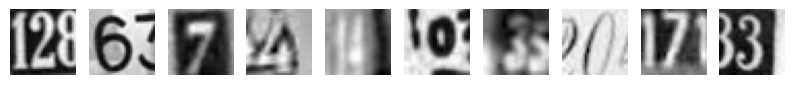

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualize 10 images in train data set
visualize_datasets(X_train, y_train)

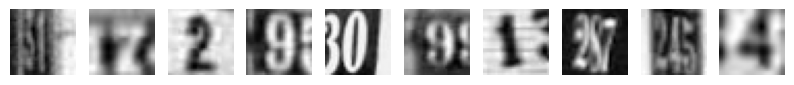

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


In [ ]:
# Visualize 10 images in test data set
visualize_datasets(X_test, y_test)

The images and the labels are matching

In [ ]:
# Take the backup
X_train_sthn = X_train.copy()
X_test_sthn = X_test.copy()

### Reshape train and test data

In [ ]:
print(f"shape of train data set :{X_train.shape}")
print(f"shape of test data set :{X_test.shape}")

shape of train data set :(42000, 32, 32)
shape of test data set :(18000, 32, 32)


In [ ]:
# Flatten the images
image_vector_size = 32*32
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

print(f"shape of train data set :{X_train.shape}")
print(f"shape of test data set :{X_test.shape}")

shape of train data set :(42000, 1024)
shape of test data set :(18000, 1024)


Each 32×32 pixel image in two dimensions is flattened into a one-dimensional array of size 1024

### Normalize the datasets

The input features represent color intensity values ranging from 0 to 255. To normalize them, each value is divided by 255.

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# print sample records in train data set
X_train

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
        0.20799099],
       [0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
        0.31092745],
       [0.48284313, 0.49356118, 0.47872823, ..., 0.36837214, 0.41093138,
        0.44637334],
       ...,
       [0.6042902 , 0.61100274, 0.6149663 , ..., 0.52993256, 0.53592   ,
        0.5398412 ],
       [0.8137075 , 0.8176286 , 0.8353796 , ..., 0.83974785, 0.8319055 ,
        0.820142  ],
       [0.37285647, 0.37677765, 0.39246237, ..., 0.5414914 , 0.5509529 ,
        0.5509529 ]], dtype=float32)

In [ ]:
# Print sample records in test data set
X_test

array([[0.15905097, 0.18349686, 0.19206432, ..., 0.43143883, 0.4360851 ,
        0.44780627],
       [0.45161137, 0.44769022, 0.44376904, ..., 0.1652502 , 0.18922432,
        0.20883021],
       [0.52256864, 0.52834475, 0.53456783, ..., 0.50266707, 0.5012169 ,
        0.5027937 ],
       ...,
       [0.6517247 , 0.64594865, 0.6385533 , ..., 0.6388313 , 0.6383843 ,
        0.63793725],
       [0.5395208 , 0.5360466 , 0.5286514 , ..., 0.56779647, 0.5599541 ,
        0.55603296],
       [0.11836078, 0.11836078, 0.11836078, ..., 0.13760431, 0.1359851 ,
        0.13368313]], dtype=float32)

The input features are normalized to a range between 0 and 1.

### Classes in target feature

In [ ]:
# verify the proportion of distribution in target feature for train data
pd.DataFrame(y_train).value_counts(normalize=True).sort_index()

,proportion
0,
0,0.099667
1,0.099333
2,0.099929
3,0.101929
4,0.099714
5,0.100762
6,0.099238
7,0.099810
8,0.099714


In [ ]:
# verify the proportion of distribution in target feature for test data
pd.DataFrame(y_test).value_counts(normalize=True).sort_index()

,proportion
0,
0,0.100778
1,0.101556
2,0.100167
3,0.095500
4,0.100667
5,0.098222
6,0.101778
7,0.100444
8,0.100667


* The dataset is balanced, with equal distribution between the training and testing sets.

* It contains 10 classes, labeled from 0 to 9.

### Transform labels

In [ ]:
# Convert to "one-hot" encoding using the to_categorical function
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat=to_categorical(y_test,num_classes)

In [ ]:
# print target feature in train data
y_train_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# print target feature in test data
y_test_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

The target labels are converted into one-hot encoded format to be suitable for training a classification neural network.

## Design Neural network

Let's build a Sequential neural network architecture with the following configuration:

* An input layer with 1024 units

* Six hidden layers consisting of 1024, 512, 256, 128, 64, and 32 neurons respectively, all using ReLU activation

* An output layer with 10 units (for 10 classes) using softmax activation

In [ ]:
model_sthn1 = tf.keras.models.Sequential()
model_sthn1.add(InputLayer(shape=(image_vector_size,)))
model_sthn1.add(Dense(1024, activation='relu',kernel_initializer='he_uniform'))
model_sthn1.add(Dense(512, activation='relu',kernel_initializer='he_uniform')) ###Multiple Dense units with Relu activation
model_sthn1.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model_sthn1.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_sthn1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_sthn1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_sthn1.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used

The model is compiled using categorical cross-entropy as the loss function and the Adam optimizer with a learning rate of 0.001. Accuracy is chosen as the evaluation metric to ensure correct predictions across all classes are effectively measured.

In [ ]:
# set learning rate
learning_rate=0.0001

In [ ]:
# compile the model
model_sthn1.compile(loss=losses.categorical_crossentropy, optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [ ]:
# print the summary of the model
model_sthn1.name='STHN_Model'
model_sthn1.summary()

Model: "STHN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,749,290 (6.67 MB)

 Trainable params: 1,749,290 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

Train the model using the following configuration:

* Number of epochs: 100

* Batch size: 128

* Validation split: 20% of the training data used for validation

In [ ]:
%%time
# Train the model
model_sthn1_history = model_sthn1.fit(X_train, y_train_cat, validation_split=0.2, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
263/263 - 15s - 58ms/step - accuracy: 0.2305 - loss: 2.1444 - val_accuracy: 0.3548 - val_loss: 1.8597
Epoch 2/100
263/263 - 12s - 46ms/step - accuracy: 0.4772 - loss: 1.6244 - val_accuracy: 0.5632 - val_loss: 1.4278
Epoch 3/100
263/263 - 21s - 80ms/step - accuracy: 0.5809 - loss: 1.3365 - val_accuracy: 0.6044 - val_loss: 1.2850
Epoch 4/100
263/263 - 13s - 49ms/step - accuracy: 0.6303 - loss: 1.1995 - val_accuracy: 0.6400 - val_loss: 1.1756
Epoch 5/100
263/263 - 13s - 49ms/step - accuracy: 0.6604 - loss: 1.1102 - val_accuracy: 0.6614 - val_loss: 1.1106
Epoch 6/100
263/263 - 20s - 77ms/step - accuracy: 0.6797 - loss: 1.0481 - val_accuracy: 0.6694 - val_loss: 1.0801
Epoch 7/100
263/263 - 20s - 76ms/step - accuracy: 0.6975 - loss: 0.9939 - val_accuracy: 0.6810 - val_loss: 1.0447
Epoch 8/100
263/263 - 21s - 80ms/step - accuracy: 0.7124 - loss: 0.9441 - val_accuracy: 0.7011 - val_loss: 0.9900
Epoch 9/100
263/263 - 21s - 78ms/step - accuracy: 0.7249 - loss: 0.9029 - val_accuracy: 

### Model Evaluation

In [ ]:
# Evaluate the loss and accuracy on train data
model_sthn1.evaluate(X_train, y_train_cat)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9221 - loss: 0.2607


[0.3992239236831665, 0.9026904702186584]

In [ ]:
# Evaluate the loss and accuracy on test data
model_sthn1.evaluate(X_test, y_test_cat)

563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8086 - loss: 1.0414


[1.0719586610794067, 0.8058888912200928]

The model demonstrates good accuracy on both the training and test datasets.

In [ ]:
# predicting the model on test data
y_pred=model_sthn1.predict(X_test)

y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step


In [ ]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1814
           1       0.81      0.84      0.83      1828
           2       0.90      0.78      0.84      1803
           3       0.76      0.78      0.77      1719
           4       0.94      0.76      0.84      1812
           5       0.74      0.83      0.79      1768
           6       0.80      0.80      0.80      1832
           7       0.76      0.91      0.83      1808
           8       0.76      0.74      0.75      1812
           9       0.86      0.73      0.79      1804

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000



The model achieves high precision, recall, and F1-score, indicating  good overall performance.

### Confusion matrix

In [ ]:
# create a function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred):
  cm=confusion_matrix(y_test,y_pred)
  plt.figure(figsize=(6,5))
  sns.heatmap(cm,annot=True,fmt='d', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  plt.show()

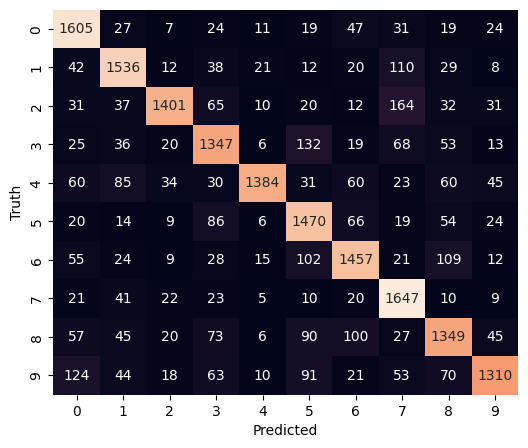

In [ ]:
# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_final)

* The model performs well in predicting the digits 0, 4, 5, 7 and 8.

* However, it struggles with accurately predicting the digits 1, 3, 6 and 9.

### Loss and Accuracy

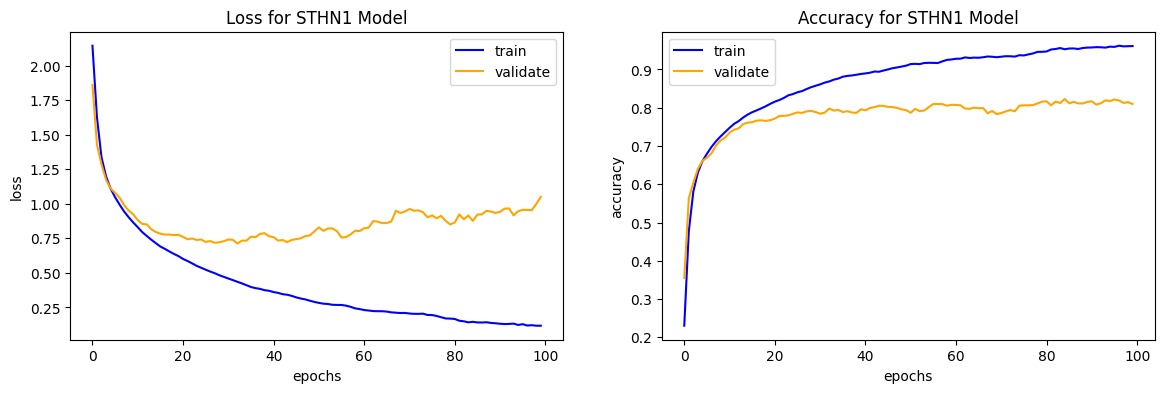

In [ ]:
# plot the loass and accuracy vs epochs
plot_loss_accuracy(model_sthn1_history.history,'STHN1 Model')

**Observations** :

* As the number of epochs increases, the training loss continues to decrease.

* On the validation set, the loss initially decreases but then starts to increase gradually.

* Accuracy improves with more epochs, but the rate of improvement slows down over time for both training and test datasets.

* The gap between training and validation loss and accuracy widens as training progresses.

### Analyze the misclassifications

In [ ]:
def analyze_misclassifications(y_test, y_pred):
  index = 0
  misclassified_images_index = []
  for label, predict in zip(y_test, y_pred):
      if label != predict:
          misclassified_images_index.append(index)
      index +=1
  print(misclassified_images_index)
  print(f'Number of missed classifications: {len(misclassified_images_index)}')
  return misclassified_images_index

In [ ]:
#Analyze misclassifications
mci = analyze_misclassifications(y_test, y_pred_final)

[7, 8, 11, 18, 27, 33, 36, 37, 40, 57, 58, 64, 67, 68, 76, 79, 83, 85, 89, 100, 108, 109, 115, 127, 136, 137, 138, 151, 152, 158, 162, 167, 182, 183, 185, 194, 200, 203, 216, 219, 222, 230, 232, 239, 242, 251, 252, 253, 256, 262, 267, 271, 284, 303, 307, 310, 317, 324, 330, 337, 346, 347, 348, 353, 356, 358, 360, 363, 371, 372, 375, 388, 389, 394, 395, 400, 403, 404, 411, 418, 422, 436, 437, 447, 448, 450, 451, 457, 480, 489, 492, 494, 498, 504, 507, 508, 511, 514, 515, 516, 517, 520, 523, 524, 527, 529, 530, 532, 534, 535, 537, 547, 551, 553, 556, 560, 577, 586, 592, 595, 600, 612, 614, 640, 648, 663, 664, 665, 671, 678, 690, 700, 704, 707, 715, 720, 753, 766, 768, 771, 787, 795, 797, 809, 813, 815, 817, 856, 860, 862, 869, 871, 872, 873, 875, 882, 887, 891, 895, 896, 907, 908, 910, 915, 917, 926, 930, 936, 941, 942, 944, 946, 948, 951, 953, 954, 955, 956, 970, 974, 988, 995, 997, 1001, 1006, 1016, 1023, 1025, 1026, 1027, 1029, 1035, 1040, 1045, 1046, 1050, 1051, 1057, 1060, 1063, 107

## Optimize Neural Network

Let's attempt to enhance the model's performance by increasing the number of neurons in the hidden layers and incorporating batch normalization and dropout techniques. These additions can help improve learning efficiency, reduce overfitting, and stabilize training.

In [ ]:
# optimize the model
dropout_rate=0.3
model_sthn2 = tf.keras.models.Sequential()
model_sthn2.add(InputLayer(shape=(image_vector_size,)))
model_sthn2.add(BatchNormalization())
model_sthn2.add(Dense(1600, activation='relu',kernel_initializer='he_uniform'))
model_sthn2.add(Dropout(dropout_rate))
model_sthn2.add(BatchNormalization())
model_sthn2.add(Dense(740, activation='relu',kernel_initializer='he_uniform'))
model_sthn2.add(Dropout(dropout_rate))
model_sthn2.add(BatchNormalization())
model_sthn2.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
model_sthn2.add(Dropout(dropout_rate))
model_sthn2.add(BatchNormalization())
model_sthn2.add(Dense(360, activation='relu',kernel_initializer='he_uniform'))
model_sthn2.add(Dropout(dropout_rate))
model_sthn2.add(BatchNormalization())
model_sthn2.add(Dense(92, activation='relu',kernel_initializer='he_uniform'))
model_sthn2.add(Dropout(dropout_rate))
model_sthn2.add(BatchNormalization())
model_sthn2.add(Dense(45, activation='relu',kernel_initializer='he_uniform'))
model_sthn2.add(Dropout(dropout_rate))
model_sthn2.add(BatchNormalization())
model_sthn2.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used

In [ ]:
# compile the model
model_sthn2.compile(loss=losses.categorical_crossentropy, optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [ ]:
model_sthn2.name = "STHN2_Model"
model_sthn2.summary()

Model: "STHN2_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_16          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1600)           │     1,640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 1600)           │         6,400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 740)            │     1,184,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 740)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 740)            │         2,960 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │       189,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 360)            │        92,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 360)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 360)            │         1,440 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 92)             │        33,212 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 92)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 92)             │           368 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 45)             │         4,185 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 45)             │           180 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           460 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,161,281 (12.06 MB)

 Trainable params: 3,153,047 (12.03 MB)

 Non-trainable params: 8,234 (32.16 KB)

### Train the model

Train the model with the below parameters

* validation_split : 0.2
* epochs : 100
* batch_size :128

In [ ]:
%%time
# Train the model
model_sthn2_history = model_sthn2.fit(X_train, y_train_cat, validation_split=0.2, epochs=100, batch_size=128, verbose=2)

Epoch 1/100
263/263 - 35s - 134ms/step - accuracy: 0.1047 - loss: 2.8638 - val_accuracy: 0.1120 - val_loss: 2.3470
Epoch 2/100
263/263 - 40s - 150ms/step - accuracy: 0.1165 - loss: 2.6928 - val_accuracy: 0.1669 - val_loss: 2.2307
Epoch 3/100
263/263 - 43s - 162ms/step - accuracy: 0.1335 - loss: 2.5507 - val_accuracy: 0.2204 - val_loss: 2.0910
Epoch 4/100
263/263 - 39s - 150ms/step - accuracy: 0.1616 - loss: 2.3935 - val_accuracy: 0.2921 - val_loss: 1.9611
Epoch 5/100
263/263 - 42s - 160ms/step - accuracy: 0.1953 - loss: 2.2505 - val_accuracy: 0.3540 - val_loss: 1.8579
Epoch 6/100
263/263 - 40s - 152ms/step - accuracy: 0.2328 - loss: 2.1209 - val_accuracy: 0.4245 - val_loss: 1.7421
Epoch 7/100
263/263 - 28s - 105ms/step - accuracy: 0.2721 - loss: 2.0006 - val_accuracy: 0.4887 - val_loss: 1.6080
Epoch 8/100
263/263 - 40s - 153ms/step - accuracy: 0.3256 - loss: 1.8811 - val_accuracy: 0.5468 - val_loss: 1.4910
Epoch 9/100
263/263 - 41s - 155ms/step - accuracy: 0.3720 - loss: 1.7664 - val_a

### Optimized Model Evaluation

In [ ]:
# print the accuracy on the train data
model_sthn2.evaluate(X_train,y_train_cat)


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9593 - loss: 0.1451


[0.21093080937862396, 0.9427618980407715]

In [ ]:
# print the accuracy on the test data
model_sthn2.evaluate(X_test,y_test_cat)

563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8634 - loss: 0.5025


[0.5142353773117065, 0.8625555634498596]

The optimized model shows improved accuracy compared to the initial model on both the training and test datasets.

In [ ]:
# predicting the model on test data
y_pred=model_sthn2.predict(X_test)

y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step


In [ ]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1814
           1       0.84      0.88      0.86      1828
           2       0.88      0.88      0.88      1803
           3       0.81      0.83      0.82      1719
           4       0.90      0.87      0.89      1812
           5       0.85      0.86      0.85      1768
           6       0.85      0.84      0.84      1832
           7       0.93      0.88      0.90      1808
           8       0.80      0.86      0.83      1812
           9       0.88      0.83      0.85      1804

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000



The precision, recall, and F1-score metrics are significantly better in the optimized model compared to the initial one.

### Confusion Matrix - Optimized Model

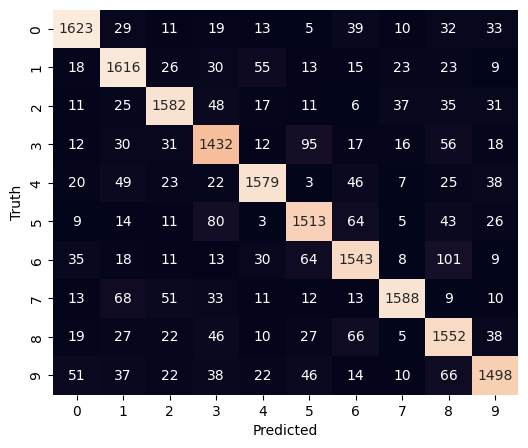

In [ ]:
plot_confusion_matrix(y_test, y_pred_final)

The optimized model achieved a higher number of correct predictions across all digit classes compared to the initial model.

### Loss and Accuracy - Optimized model

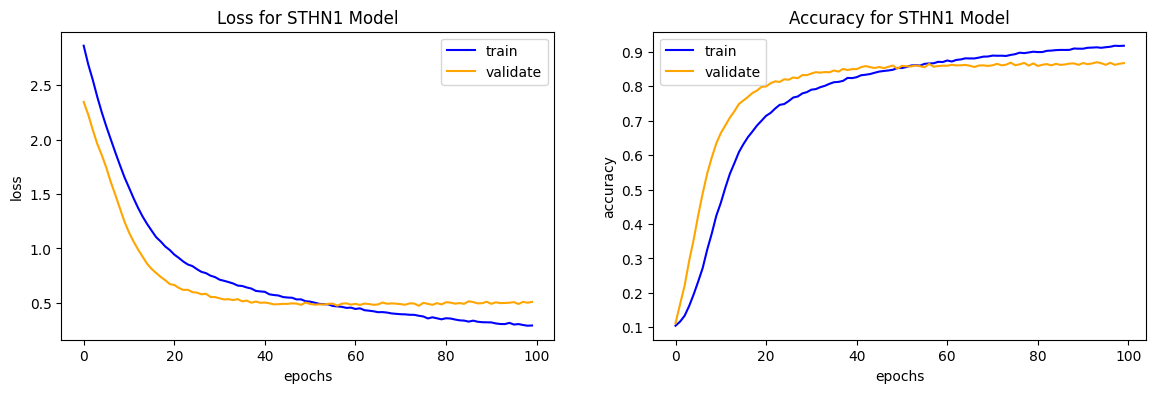

In [ ]:
# plot the loass and accuracy vs epochs
plot_loss_accuracy(model_sthn2_history.history,'STHN1 Model')

**Observations**:

* As the number of epochs increases, the training loss steadily decreases.

* While accuracy continues to improve with more epochs, the rate of improvement gradually slows for both the training and test datasets.

* In the optimized model, the gap between training and validation loss and accuracy is noticeably smaller, indicating better generalization.

### Analyze Misclassifications

In [ ]:
misclassified_images_index = analyze_misclassifications(y_test, y_pred_final)

[7, 8, 11, 27, 46, 56, 64, 68, 79, 85, 100, 108, 125, 127, 132, 137, 138, 151, 155, 158, 176, 183, 184, 185, 188, 199, 200, 203, 222, 223, 228, 232, 235, 251, 252, 253, 256, 267, 284, 303, 307, 323, 337, 347, 360, 363, 372, 389, 395, 404, 415, 418, 437, 446, 451, 456, 457, 489, 494, 498, 504, 514, 517, 520, 523, 524, 526, 527, 532, 535, 537, 547, 551, 556, 560, 590, 592, 600, 612, 619, 633, 640, 661, 663, 664, 665, 671, 691, 694, 704, 706, 720, 738, 753, 754, 768, 771, 780, 795, 809, 813, 856, 860, 862, 865, 871, 873, 875, 887, 891, 895, 896, 908, 910, 926, 935, 936, 946, 948, 951, 953, 954, 955, 965, 985, 988, 995, 997, 1001, 1006, 1011, 1021, 1027, 1029, 1035, 1041, 1045, 1046, 1051, 1057, 1060, 1074, 1080, 1084, 1086, 1089, 1105, 1109, 1112, 1126, 1132, 1133, 1137, 1139, 1142, 1151, 1154, 1155, 1156, 1159, 1169, 1175, 1184, 1186, 1194, 1204, 1205, 1207, 1208, 1220, 1232, 1241, 1252, 1256, 1260, 1277, 1291, 1296, 1301, 1313, 1318, 1323, 1341, 1348, 1353, 1357, 1365, 1366, 1375, 1378,

In [ ]:
X_test_mci = []
y_test_pred_mci = []
y_test_mci = []
for i in misclassified_images_index:
  X_test_mci.append(X_test_sthn[i])
  y_test_pred_mci.append(int(y_pred_final[i]))
  y_test_mci.append(int(y_test[i]))

Actual label for each of the above image: [8, 4, 9, 1, 7, 1, 9, 4, 4, 4]


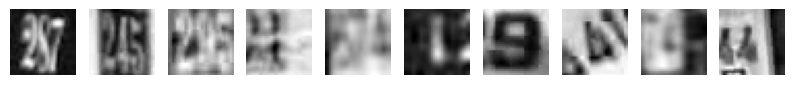

label for each of the above image: [5, 1, 2, 2, 2, 4, 8, 6, 0, 6]


In [ ]:
print(f'Actual label for each of the above image: {y_test_mci[0:10]}')
visualize_datasets(X_test_mci,y_test_pred_mci)

* The overall misclassification rate is approximately 13%.

* The optimized model has reduced the number of misclassifications compared to the initial version.

* The model struggles to make accurate predictions on blurred or low-resolution images—some of which are challenging even for the human eye to recognize.

## STHN - Final Model selection

In [ ]:
results = []
for model in [model_sthn1, model_sthn2]:
  results.append(
    {
     'model' : model.name,
     'Train Loss' : model.evaluate(X_train, y_train_cat)[0],
     'Train Accuracy' :  model.evaluate(X_train, y_train_cat)[1],
     'Test Loss' : model.evaluate(X_test, y_test_cat)[0],
     'Test Accuracy' :  model.evaluate(X_test, y_test_cat)[1]
     }
  )

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9221 - loss: 0.2607
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9221 - loss: 0.2607
563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8086 - loss: 1.0414
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8086 - loss: 1.0414
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9593 - loss: 0.1451
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9593 - loss: 0.1451
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8634 - loss: 0.5025
563/563 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8634 - loss: 0.5025


In [ ]:
pd.DataFrame(results).set_index('model')

,Train Loss,Train Accuracy,Test Loss,Test Accuracy
model,,,,
STHN_Model,0.399224,0.902690,1.071959,0.805889
STHN2_Model,0.210931,0.942762,0.514235,0.862556


**Observations**:

* The optimized model has been selected for digit detection in STHN images, as it outperforms the version without dropout and batch normalization.

* While the model delivers strong performance, it still fails in approximately 14% of cases. To achieve better results, more advanced architectures like Convolutional Neural Networks (CNNs) and other models should be explored.